<a href="https://colab.research.google.com/github/jackie-Gung/Colab_ESAA/blob/main/2022_09_19_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.필요한 라이브러리 불러오기**
---

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [3]:
## 이 부분 에러남
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("code949")) #check the files available in the directory

### **2.데이터 불러오기**
---

In [4]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### **3.데이터 전처리 및 EDA**
---

#### **1) 데이터 개수 확인하기**

In [7]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


#### **2) 필요없는 칼럼 삭제하기**

In [8]:
# 'ID' 칼럼
train_ID = train['Id']
test_ID = test['Id']

# 'ID' 칼럼 삭제하기
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

# 'ID' 칼럼 잘 삭제됐는지 확인하기
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


#### **3) Outliers 확인 및 제거하기**

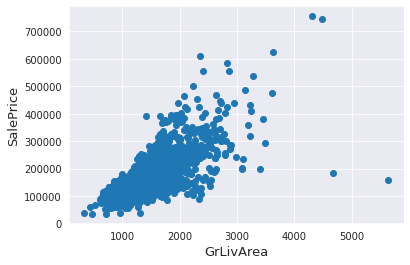

In [9]:
# Outliers 확인하기
fig,ax = plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()

- **분석:** GrLivArea가 엄청 크면서 SalePrice는 작은 부분에 2개의 outlier가 존재함. 너무 벗어나 있기 때문에 제거해야함

In [10]:
# Outliers 제거하기
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice'] < 300000)].index)

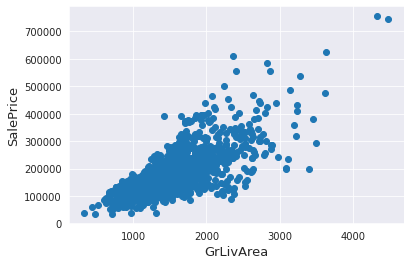

In [11]:
# 잘 제거됐는지 확인하기
fig,ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()

- **결과**
      1. 다른 outliers도 존재하지만, 모두 제거하게 되면 검증 데이터에 outliers가 있을 경우 모델에 안 좋은 영향을 미칠 수 있음
      2. 따라서 어느 정도 잡음은 가지고 있는게 모델 성능에 좋을 것으로 예상됨

#### **4) 타깃 변수 확인 및 변환하기**

- **타깃 변수 확인하기**


 mu = 180932.92 and sigma = 79467.79



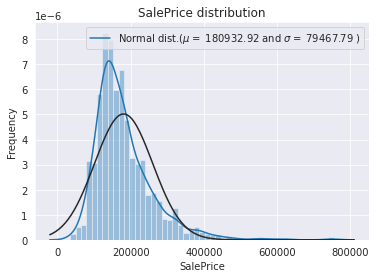

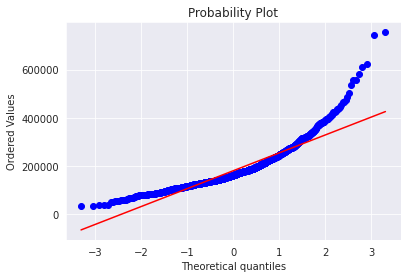

In [12]:
sns.distplot(train['SalePrice'],fit=norm);

# 함수를 이용해서 fitted parameter 불러오기
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

# 분포 나타내기
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ-plot으로 정규성 나타내기
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

- **분석**
      1. 타깃 변수를 보면 right skewed된 것을 알 수 있음
      2. 정규성을 만족시키기 위해 데이터를 변환해야함

- **타깃 변수 로그 변환하기**

In [13]:
train['SalePrice'] = np.log1p(train['SalePrice'])


 mu = 12.02 and sigma = 0.40



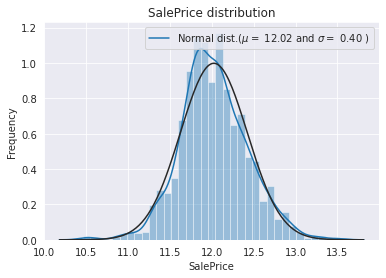

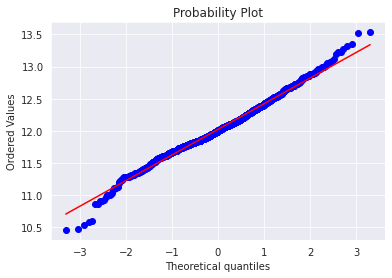

In [14]:
# 분포 확인하기
sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

# 분포 나타내기
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ-plot으로 정규성 나타내기
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

- **결과:** 기울어진 정도가 중앙으로 몰렸고, 정규성을 거의 만족시킴

#### **5) Features Engineering**

- **train/test 데이터 합치기**

In [15]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True) # concat(): 세로로 합쳐짐
all_data.drop(['SalePrice'], axis=1, inplace=True)
print('all_data size is : {}'.format(all_data.shape))

all_data size is : (2917, 79)


- **missing data 비율 확인하기**

In [17]:
all_data_na = (all_data.isnull().sum() / len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageQual,5.451
GarageCond,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

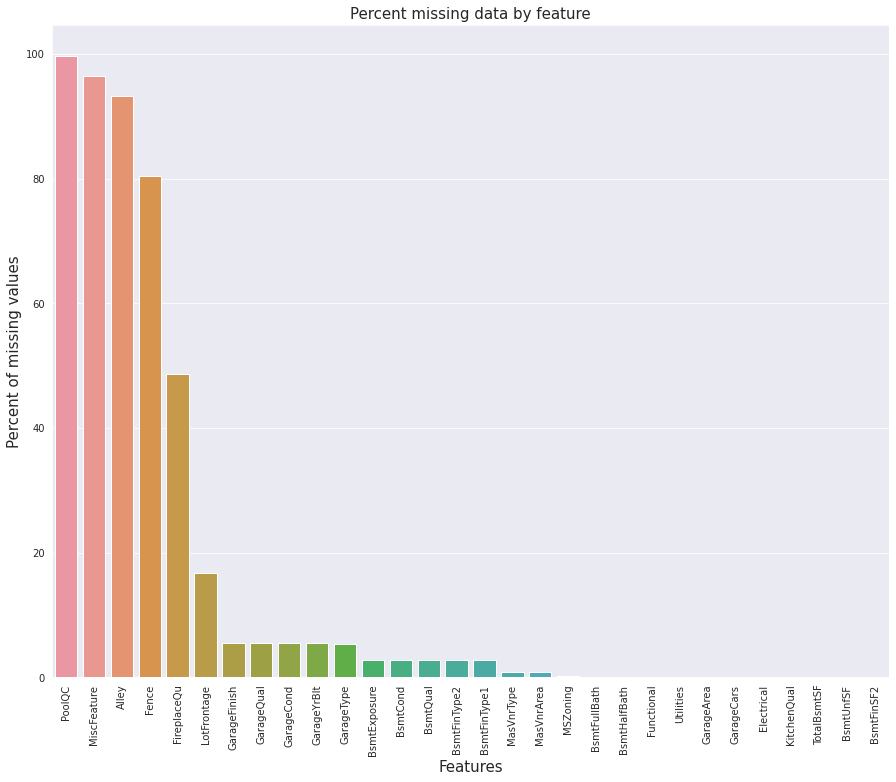

In [18]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation = '90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

- **Data Correlation**

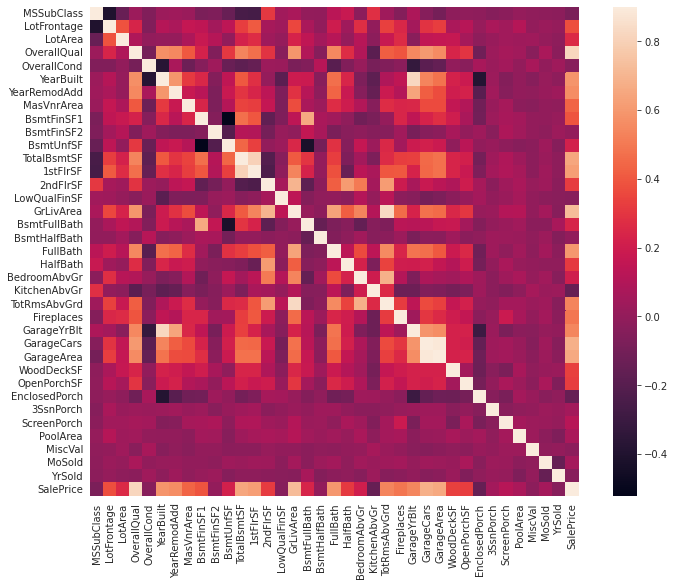

In [19]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9, square=True)

- **missing values**
      1. PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
      2. MiscFeature : data description says NA means "no misc feature"
      3. Alley : data description says NA means "no alley access"
      4. Fence : data description says NA means "no fence"
      5. FireplaceQu : data description says NA means "no fireplace"
      6.LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
      7. GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
      8. BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
      9. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
      10. MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
      11. MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
      12. Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
      13. Functional : data description says NA means typical
      14. Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
      15. KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
      16. Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
      17. SaleType : Fill in again with most frequent which is "WD"
      18. MSSubClass : Na most likely means No building class. We can replace missing values with None


In [20]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [21]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [22]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna('0')

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [23]:
all_data = all_data.drop(['Utilities'], axis=1)

In [24]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')

- **missing value 남아있는지 확인하기**

In [25]:
all_data_na = (all_data.isnull().sum() / len(all_data)) *100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head()

,Missing Ratio


- **결과:** missing value는 없다

#### **6) More Features Engineering**

- **categorical 변수를 numerical 변수로 변환하기**

In [26]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [28]:
all_data[['MSSubClass', 'OverallCond','YrSold','MoSold']].head()

,MSSubClass,OverallCond,YrSold,MoSold
0,60,5,2008,2
1,20,8,2007,5
2,60,5,2008,9
3,70,5,2006,2
4,60,5,2008,12


- **Label Encoding(categorical variables that contain ordering info)**

In [29]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 
        'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 
        'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 
        'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


- **Add important feature**

In [30]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

- **Skewed features**

In [31]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# numerical features의 skew 정도를 확인하기
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('\n Skew in numerical features: \n')
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)


 Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


- **Box Cox Transformation of skewed features**

In [32]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

## kaggle 결과와 다름 (59)

There are 58 skewed numerical features to Box Cox transform


- **Getting dummy categorical features**

In [33]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

## kaggle 결과와 다름(220)

(2917, 662)


In [34]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### **4. Modelling**
---

#### **1) 필요한 라이브러리 불러오기**

In [35]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#### **2) cross validation**

In [36]:
n_folds = 5

def rmsle_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
  rmse = np.sqrt(-cross_val_score(model,train.values,y_train,scoring='neg_mean_squared_error',cv=kf))
  return (rmse)

#### **3) base models**

- **Lasso Regression**

In [37]:
lasso = make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))

- **Elastic Net Regression**

In [38]:
ENet = make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005,l1_ratio=.9,random_state=3))

- **Kernel Ridge Regression**

In [39]:
KRR = KernelRidge(alpha=0.6,kernel='polynomial',degree=2,coef0=2.5) #

- **Gradient Boosting Regression**

In [40]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

- **XGBoost**

In [41]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

- **LightGBM**

In [42]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### **4) Base Models Scores**

In [43]:
score = rmsle_cv(lasso)
print('\nLasso score: {:.4f} ({:.4f})\n'.format(score.mean(),score.std()))


Lasso score: 0.1115 (0.0074)



In [44]:
score = rmsle_cv(ENet)
print('\nENet score: {:.4f} ({:.4f})\n'.format(score.mean(),score.std()))


ENet score: 0.1115 (0.0075)



In [45]:
score = rmsle_cv(KRR)
print('\nKRR score: {:.4f} ({:.4f})\n'.format(score.mean(),score.std()))


KRR score: 0.1174 (0.0059)



In [46]:
score = rmsle_cv(GBoost)
print('\nGBoost score: {:.4f} ({:.4f})\n'.format(score.mean(),score.std()))


GBoost score: 0.1162 (0.0074)



In [47]:
score = rmsle_cv(model_xgb)
print('\nmodel_xgb score: {:.4f} ({:.4f})\n'.format(score.mean(),score.std()))


model_xgb score: 0.1174 (0.0072)



In [48]:
score = rmsle_cv(model_lgb)
print('\nmodel_lgb score: {:.4f} ({:.4f})\n'.format(score.mean(),score.std()))


model_lgb score: 0.1165 (0.0067)



#### **5) Stacking Models**

- **Averaged base models class**

In [49]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 본 모델을 복제해서 복제한 모델에 fit하기
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # 복제한 모델을 predict하고 평균 계산하기
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [50]:
average_models = AveragingModels(models=(ENet,GBoost,KRR,lasso))

score = rmsle_cv(average_models)
print('Averaged base models score: {:.4f} ({:.4f})\n'.format(score.mean(),score.std()))

Averaged base models score: 0.1092 (0.0071)



- **Less simple Stacking: Adding a Meta-model**
      - 학습 부분의 절차
        1. 전체 학습 데이터를 두 개의 세트로 나누기
        2. 학습 데이터를 베이스 모델로 훈련하기
        3. 베이스 모델을 검증하기
        4. 3)의 예측을 input으로, 타깃 변수를 output으로 대입해 더 높은 단계인 meta model을 훈련하기


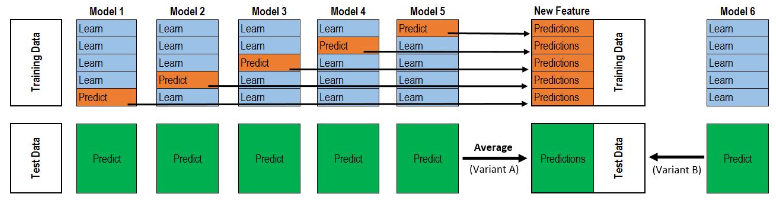

- **Stacking averaged Models Class**

In [51]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # 본 모델의 clone 만들어서 데이터 적합하기
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # clone 베이스모델을 훈련하고 복제한 메타모델을 훈련하기 위해 예측하기
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # 복제한 메타모델을 훈련하고 새로운 피처로 out-of-fold 예측하기
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    # 테스트 데이터로 모든 베이스모델을 예측하고 평균 예측 계산하기 
    # 메타 모델로 최종 예측을 위한 메타 피처 만들기
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [52]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1083 (0.0075)


- **Ensembling StackedRegressor, XGBoost, LightGBM**

In [53]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

- **Final Training and Prediction**

- StackedRegressor

In [54]:
stacked_averaged_models.fit(train.values,y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train,stacked_train_pred))

0.08289324365350914


- XGBoost

In [55]:
model_xgb.fit(train,y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train,xgb_train_pred))

0.07817382431710135


- LightGBM

In [56]:
model_lgb.fit(train,y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train,lgb_train_pred))

0.07293558543830697


In [57]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 + xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07865702706562619


- **Ensemble Prediction**

In [58]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

- **Submission**

In [59]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)